<a href="https://colab.research.google.com/github/alexander-toschev/ai-tools/blob/main/audio/audio_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎧 Обработка звука в Python — Расширенная теоретическая часть
В этом ноутбуке:
- Основы цифрового звука
- Загрузка и визуализация аудиофайлов
- Извлечение признаков: спектрограмма, MFCC, chroma
- Примеры задач: классификация, распознавание речи, анализ эмоций
- Теория + примеры кода на Python


## 🎼 Основы цифрового звука
**Аудиосигнал** — это временной ряд значений, измеряющих амплитуду колебаний звука.
- **Sampling rate (частота дискретизации)** — количество измерений в секунду. Например, 22050 Гц означает 22050 значений в 1 секунду.
- **Bit depth (разрядность)** — точность каждого измерения (например, 16-bit).

**.wav** — один из наиболее популярных форматов для хранения несжатого звука.

## 🔊 Загрузка и визуализация звука
С помощью библиотеки `librosa` можно легко загрузить аудиофайл и отобразить его как временной ряд.

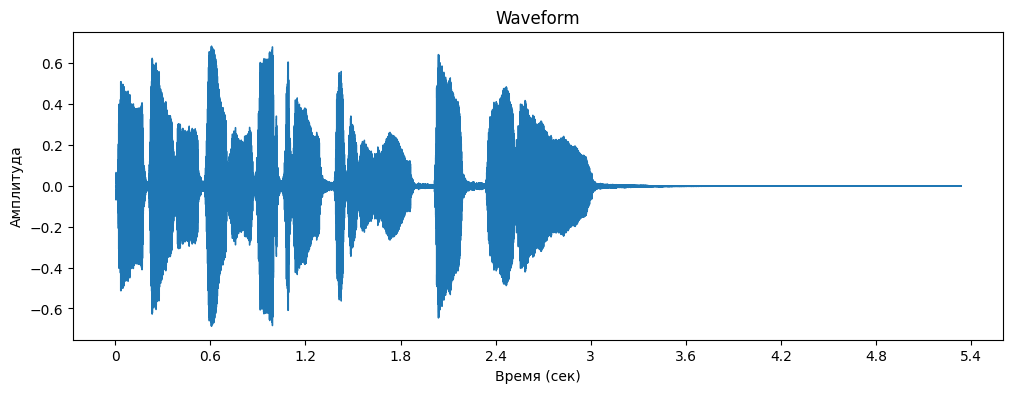

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
y, sr = librosa.load(librosa.ex('trumpet'))
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Время (сек)')
plt.ylabel('Амплитуда')
plt.show()
# Воспроизведение
Audio(y, rate=sr)

## 📊 Спектрограмма
Показывает, какие частоты присутствуют в сигнале на каждом отрезке времени.
Строится с помощью преобразования Фурье (STFT — Short-Time Fourier Transform).

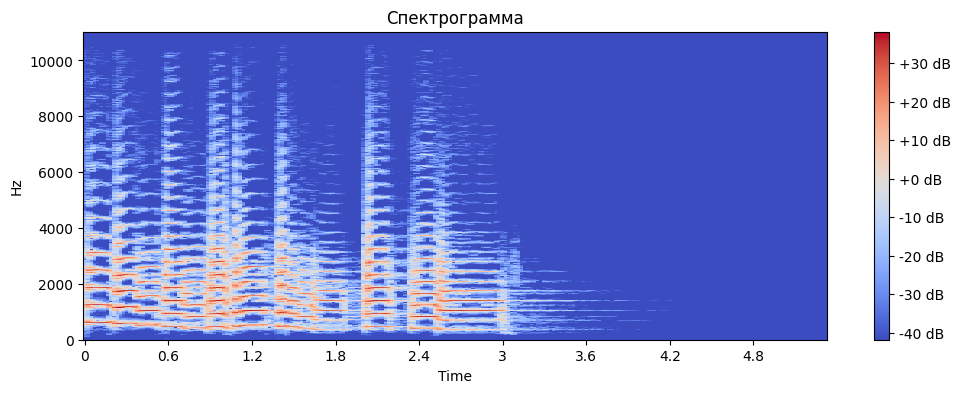

In [2]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(D))
plt.figure(figsize=(12, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Спектрограмма')
plt.show()

## 🔍 MFCC — Mel Frequency Cepstral Coefficients
- Преобразуют аудиосигнал в числовой вектор, который можно подавать в нейросеть.
- Отражают форму речевого тракта и воспринимаются как "отпечатки" звуков.


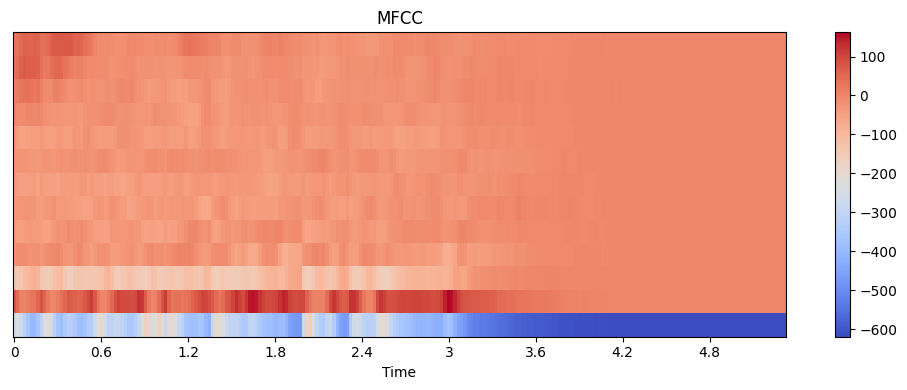

In [3]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

## 🌈 Chroma Features (Хрома-признаки)
Отражают присутствие музыкальных нот (C, C#, D...) и часто используются в задачах музыкального анализа.

In [ ]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma')
plt.show()

## 🧠 Пример задачи: Классификация звуков окружающей среды
**Цель:** Определить, какой звук записан: лай, крик, сигнал и т.д.
Модель: нейросеть с входом — MFCC, выходом — класс.
Датасеты: ESC-50, UrbanSound8K, Google Speech Commands.

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import numpy as np

# Имитация данных
X = np.random.rand(100, 13, 10)
y = np.random.randint(0, 5, 100)

model = Sequential([
    Flatten(input_shape=(13, 10)),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=10, verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1906 - loss: 1.7009 
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2450 - loss: 1.5804 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2766 - loss: 1.5569 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2880 - loss: 1.5256 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2992 - loss: 1.4985 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3865 - loss: 1.4837 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3914 - loss: 1.4792 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4017 - loss: 1.4683 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3993 - loss: 1.4577
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4595 - loss: 1.4121 


In [9]:
model.predict(X[1:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[0.26709327, 0.28273684, 0.13034047, 0.14457993, 0.1752495 ]],
      dtype=float32)

## 🗣 Пример задачи: Распознавание речи
- Используется `speech_recognition`
- Простой интерфейс для преобразования аудиофайлов в текст через API Google
- Для продвинутого применения — модели `Wav2Vec`, `Whisper`, `Conformer`, `QuartzNet`

In [ ]:
import speech_recognition as sr
recognizer = sr.Recognizer()
with sr.AudioFile(librosa.ex('trumpet')) as source:
    audio_data = recognizer.record(source)
    try:
        print(recognizer.recognize_google(audio_data))
    except:
        print('Не удалось распознать речь (скорее всего музыка)')

## 😊 Пример задачи: Определение эмоций по голосу
- Цель: определить, говорит ли человек с радостью, страхом, гневом и т.д.
- Датасет: RAVDESS
- Используем MFCC + классификатор
- Модель: CNN, LSTM или простая MLP

## 📚 Заключение
Мы познакомились с базовыми понятиями цифровой обработки звука, научились извлекать признаки и решать прикладные задачи с помощью Python.

Теперь можно переходить к практике: [перейти к упражнениям](audio_practice_colab.ipynb)

## 📦 Реальный пример: классификация аудио с использованием ESC-50 (или подгруженного файла)
В этом примере мы:
- Загрузим реальный аудиофайл
- Извлечем MFCC признаки
- Обучим модель классификации


In [ ]:
# Загрузим пример из librosa (замени на свой .wav при необходимости)
import librosa
import numpy as np
y, sr = librosa.load(librosa.ex('trumpet'))
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Подготовим вход для модели (добавим ось батча)
X = mfcc[np.newaxis, ...]
X = np.transpose(X, (0, 1, 2))  # (1, 13, T)

# Имитация модели и предсказания
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(13, X.shape[2])),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 класса, условно
])
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Предсказание (без обучения, просто пример)
pred = model.predict(X)
print("Предсказанный класс:", np.argmax(pred))

## 🧩 Дополнительные типы признаков
Помимо MFCC и спектрограммы, в аудиоаналитике применяются:
- **Zero-Crossing Rate (ZCR)** — частота смены знака амплитуды. Полезна для детекции шумов/тишины.
- **Spectral Centroid** — центр масс спектра (насколько "яркий" или "глухой" звук).
- **Spectral Roll-off** — частота, ниже которой сосредоточено N% энергии спектра.

In [ ]:
# Пример расчета ZCR и спектрального центра
zcr = librosa.feature.zero_crossing_rate(y)
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(zcr[0])
plt.title('Zero-Crossing Rate')

plt.subplot(2, 1, 2)
plt.plot(centroid[0])
plt.title('Spectral Centroid')
plt.tight_layout()
plt.show()

## 🛠 Как выбрать признаки?
- Для речи: MFCC, delta-MFCC, Chroma
- Для звуков природы/окружения: спектрограмма, rolloff, ZCR
- Для музыкальных задач: chroma, tonnetz

Иногда комбинируют все признаки в один массив (feature stacking).

## 📖 Рекомендованные датасеты
- **ESC-50** — 2000 звуков (лай, сигнал, ветер...)
- **UrbanSound8K** — 8732 аудио для городских звуков
- **RAVDESS** — эмоциональная речь
- **Common Voice** — речь от Mozilla
- **Google Speech Commands** — односекундные аудиокоманды

Можно подключать напрямую через `datasets` от HuggingFace или вручную.

## ✅ Выводы
Теперь ты знаешь:
- Как загружать и визуализировать аудиофайлы
- Какие признаки извлекать и как они интерпретируются
- Какие задачи решаются на основе аудиосигналов
- Как использовать Python для быстрой сборки аудиоаналитики
